In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data
df = pd.read_csv('diamonds.csv')

In [4]:
# Correlation heatmap analysis

numeric_df = df.select_dtypes(include='number') 
corr = numeric_df.corr()

In [5]:
# Sort values by price
corr_price = corr[['price']].sort_values(by='price', ascending=False)

<Axes: >

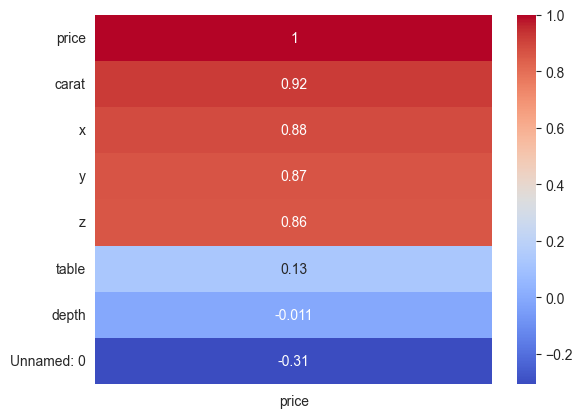

In [6]:
# Heatmap of corr_price
sns.heatmap(corr_price, annot=True, cmap='coolwarm')

In [7]:
# Dropping columns without corr

df = df.drop(columns=['Unnamed: 0', 'depth'])

In [8]:
# Mapping and coding object columns

cut_order = {
    'Fair': 0,
    'Good': 1, 
    'Very Good': 2, 
    'Premium': 3, 
    'Ideal': 4
    }

color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
color_mapping = {color: idx for idx, color in enumerate(color_order)}

clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_mapping = {clarity: idx for idx, clarity in enumerate(clarity_order)}

In [9]:
df['cut'] = df['cut'].map(cut_order)
df['clarity'] = df['clarity'].map(clarity_mapping)
df['color'] = df['color'].map(color_mapping)

In [10]:
# separation label and features

X = df.drop(columns=['price'])
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Scaling X numerical data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
model = RandomForestRegressor(n_estimators=200) 
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse)
print(rmse)
print(r2)

285445.8101377203
534.2712888951833
0.9819628018662611


In [18]:
input_data = [[-1.177071,-0.809695,-2.002131,1.183265,-0.204605,-1.596752,-1.553707,-1.500277
               ]]

input_df = pd.DataFrame(input_data, columns=X.columns)
prediction = model.predict(input_df)

print(prediction)

[371.535]
